In [2]:
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pickle
import joblib
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf

Class and Class ID :-
1. Asthma
2. Bronchiectasis
3. Bronchiolitis
4. Copd
5. Healthy
6. LRTI
7. Pneumonia
8. URTI

In [41]:
X=np.load('X-STFTandMFCC-7.npy')

In [42]:
y=np.load('y-STFTandMFCC-7.npy')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)
print(X_train.shape,X_test.shape)

(665, 128, 372, 2) (222, 128, 372, 2)


In [44]:
X_train = np.array((X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)))
X_test = np.array((X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)))
X_train = X_train/np.std(X_train)
X_test = X_test/np.std(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)
print(X_train.shape, X_test.shape, X_val.shape, len(y_train), len(y_test), len(y_val))

(498, 128, 372, 2) (222, 128, 372, 2) (167, 128, 372, 2) 498 222 167


In [59]:
X_train

array([[[[27.26535 ,  9.915552],
         [27.369642, 10.276651],
         [27.36838 , 10.691795],
         ...,
         [27.281052, 10.064873],
         [27.329102, 10.489162],
         [27.284727, 10.53682 ]],

        [[27.265686, 27.79262 ],
         [27.323149, 28.282663],
         [27.328209, 28.754782],
         ...,
         [27.272785, 27.987152],
         [27.358425, 28.58574 ],
         [27.284548, 28.63205 ]],

        [[27.26581 , 27.73339 ],
         [27.270576, 28.166327],
         [27.270401, 28.353273],
         ...,
         [27.264929, 27.881805],
         [27.360077, 28.473585],
         [27.33933 , 28.463585]],

        ...,

        [[27.264526, 27.24667 ],
         [27.264526, 27.224293],
         [27.264526, 27.244139],
         ...,
         [27.264526, 27.236202],
         [27.264526, 27.251991],
         [27.264526, 27.2316  ]],

        [[27.264526, 27.251877],
         [27.264526, 27.228113],
         [27.264526, 27.264217],
         ...,
         [27.2645

<Font size = 6> <b> CNN Model </b></font>

<b> Complex model </b>

In [60]:
input_shape=(128,372,2)
CNNmodel = models.Sequential()
CNNmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(layers.Flatten())
CNNmodel.add(layers.Dense(64, activation='relu'))
CNNmodel.add(layers.Dropout(0.2))
CNNmodel.add(layers.Dense(32, activation='relu'))
CNNmodel.add(layers.Dense(24, activation='softmax'))

In [61]:
CNNmodel.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

<b> Epoch = 5 </b>

In [62]:
history = CNNmodel.fit(X_train, y_train, epochs=5, validation_data= (X_val, y_val))

Epoch 1/5
16/16 [==============================] - 8s 502ms/step - loss: 22.6600 - accuracy: 0.7992 - val_loss: 3.1488 - val_accuracy: 0.8982
Epoch 2/5
16/16 [==============================] - 8s 486ms/step - loss: 0.7992 - accuracy: 0.8916 - val_loss: 3.1192 - val_accuracy: 0.8982
Epoch 3/5
16/16 [==============================] - 8s 485ms/step - loss: 0.5915 - accuracy: 0.8936 - val_loss: 3.1065 - val_accuracy: 0.8982
Epoch 4/5
16/16 [==============================] - 8s 484ms/step - loss: 0.5855 - accuracy: 0.8916 - val_loss: 3.0951 - val_accuracy: 0.8982
Epoch 5/5
16/16 [==============================] - 8s 486ms/step - loss: 0.5905 - accuracy: 0.8916 - val_loss: 3.0843 - val_accuracy: 0.8982


<b> Epoch = 20 </b>

In [18]:
history = CNNmodel.fit(X_train, y_train, epochs=20, validation_data= (X_val, y_val))

Epoch 1/20
 1/16 [>.............................] - ETA: 0s - loss: 0.4166 - accuracy: 0.9375

KeyboardInterrupt: 

<Font size = 5.5><b>For preventing overfit !!!!!</b></Font>

In [22]:
input_shape=(128,4800,2)
CNNmodel = models.Sequential()
CNNmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Flatten())
CNNmodel.add(layers.Dense(32, activation='relu'))
CNNmodel.add(layers.Dense(24, activation='softmax'))
CNNmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 4798, 32)     608       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 2399, 32)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4836384)           0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                154764320 
_________________________________________________________________
dense_6 (Dense)              (None, 24)                792       
Total params: 154,765,720
Trainable params: 154,765,720
Non-trainable params: 0
_________________________________________________________________


In [23]:
CNNmodel.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

<b> Epoch = 5 (decreasing overfitting) </b>

In [24]:
history = CNNmodel.fit(X_train, y_train, epochs=5, validation_data= (X_val, y_val))

Epoch 1/5
16/16 [==============================] - 44s 3s/step - loss: 5724.6665 - accuracy: 0.7791 - val_loss: 3560.1812 - val_accuracy: 0.8982
Epoch 2/5
16/16 [==============================] - 44s 3s/step - loss: 2139.6792 - accuracy: 0.6506 - val_loss: 726.4044 - val_accuracy: 0.8982
Epoch 3/5
16/16 [==============================] - 45s 3s/step - loss: 497.7047 - accuracy: 0.8394 - val_loss: 253.7181 - val_accuracy: 0.8982
Epoch 4/5
16/16 [==============================] - 43s 3s/step - loss: 81.9877 - accuracy: 0.4699 - val_loss: 2.5993 - val_accuracy: 0.6048
Epoch 5/5
16/16 [==============================] - 42s 3s/step - loss: 1.9614 - accuracy: 0.8614 - val_loss: 1.5412 - val_accuracy: 0.8982


 <b>Epoch = 20 (decreasing overfitting) </b>

In [27]:
history = CNNmodel.fit(X_train, y_train, epochs=20, validation_data= (X_val, y_val))

Epoch 1/20
16/16 [==============================] - 230s 14s/step - loss: 5213.9009 - accuracy: 0.5502 - val_loss: 2017.5857 - val_accuracy: 0.8982 - ETA: 3:52 - loss: 12291.8154
Epoch 2/20
16/16 [==============================] - 90s 6s/step - loss: 960.8845 - accuracy: 0.8916 - val_loss: 1210.3083 - val_accuracy: 0.0000e+00
Epoch 3/20
16/16 [==============================] - 66s 4s/step - loss: 95.8411 - accuracy: 0.1426 - val_loss: 3.1542 - val_accuracy: 0.0359
Epoch 4/20
16/16 [==============================] - 50s 3s/step - loss: 3.1363 - accuracy: 0.1406 - val_loss: 3.1181 - val_accuracy: 0.8982
Epoch 5/20
16/16 [==============================] - 50s 3s/step - loss: 3.1034 - accuracy: 0.8916 - val_loss: 3.0862 - val_accuracy: 0.8982
Epoch 6/20
16/16 [==============================] - 50s 3s/step - loss: 3.0724 - accuracy: 0.8916 - val_loss: 3.0558 - val_accuracy: 0.8982
Epoch 7/20
16/16 [==============================] - 51s 3s/step - loss: 3.0428 - accuracy: 0.8916 - val_loss: 3

<b> For plotting</b>

<b> Epoch = 5 (simpler model)</b>

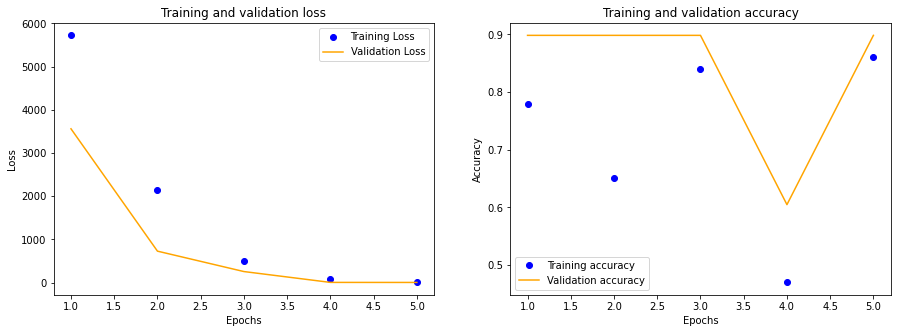

In [32]:
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,6)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'bo',label='Training Loss')
ax1.plot(epochs,val_loss_values,'orange', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'bo', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

In [13]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [26]:
# predict probabilities for test set
yhat_probs = CNNmodel.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = CNNmodel.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]


In [27]:
display(yhat_classes)
display(y_test)

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int64)

array([4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 7, 8, 4, 4, 4, 4, 4, 4, 4, 4, 6,
       8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 6, 7, 4, 6,
       4, 4, 7, 6, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 6, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4,
       4, 6, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int64)

In [28]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes,pos_label='positive', average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, pos_label='positive',average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,pos_label='positive',average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.891892
Precision: 0.891892
Recall: 0.891892
F1 score: 0.891892


<b> Epoch = 5 </b>

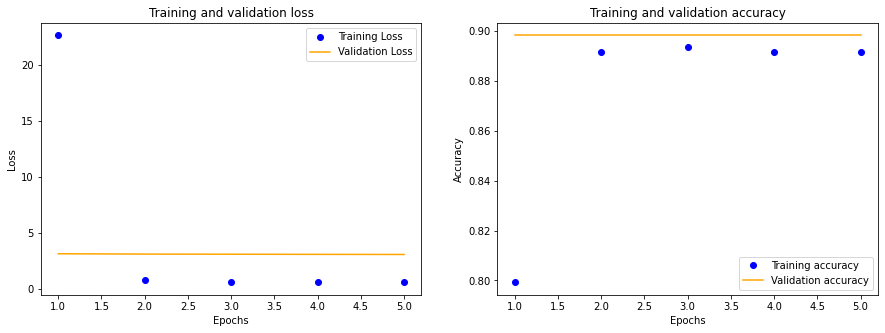

In [63]:
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,6)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'bo',label='Training Loss')
ax1.plot(epochs,val_loss_values,'orange', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'bo', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

In [53]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [64]:
# predict probabilities for test set
yhat_probs = CNNmodel.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = CNNmodel.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]


In [65]:
display(yhat_classes)
display(y_test)

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int64)

array([4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 7, 8, 4, 4, 4, 4, 4, 4, 4, 4, 6,
       8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 6, 7, 4, 6,
       4, 4, 7, 6, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 6, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4,
       4, 6, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int64)

In [66]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes,pos_label='positive', average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, pos_label='positive',average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,pos_label='positive',average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.891892
Precision: 0.891892
Recall: 0.891892
F1 score: 0.891892
